In [1]:
import numpy as np
import pandas as pd
import pymongo
import json
import datetime as dt
import pickle
from bs4 import BeautifulSoup as bs
from splinter import Browser
import time
from sklearn.externals import joblib

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
# create mongo db connection
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# connect to my nba data db
db = client.nba_data_db

In [5]:
temp = db.training_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_train = pd.DataFrame(temp)

# Four Factor Model

In [6]:
X_train = df_train.loc[:,['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_train = df_train['W/L']

In [7]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [8]:
scaler_filename = "fourfactor_scaler.save"
joblib.dump(X_scaler, scaler_filename)

['fourfactor_scaler.save']

In [9]:
fourfactor_model = LogisticRegression(verbose=1)

In [11]:
# Fit the model to the data
# YOUR CODE HERE
fourfactor_model.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [12]:
fourfactor_model.coef_

array([[ 4.91329346,  0.99873369, -2.22702119,  2.01833405, -0.99873369,
        -2.01833405,  2.22702119, -4.91329346]])

In [13]:
temp = db.testing_data.find()
temp = list(temp)
for i in temp:
    i.pop('_id', None)
df_test = pd.DataFrame(temp)

In [14]:
X_test = df_test.loc[:,['eFG%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [15]:
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Print the r2 score for the test data
# YOUR CODE HERE
fourfactor_model.score(X_test_scaled, y_test)

0.9350993377483444

In [28]:
fourfactor_filename = 'fourfactor.pkl'
pickle.dump(fourfactor_model, open(fourfactor_filename, 'wb'))

# Try Using Pace as Feature

In [17]:
X_train = df_train.loc[:,['TS%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%', 'PACE']]
y_train = df_train['W/L']

In [18]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [19]:
newModel = LogisticRegression()

In [21]:
newModel.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
X_test = df_test.loc[:,['TS%', 'FTARate', 'TOV%', 'OREB%', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%', 'PACE']]
y_test = df_test['W/L']

In [23]:
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Print the r2 score for the test data
# YOUR CODE HERE
newModel.score(X_test_scaled, y_test)

0.9490066225165563

In [25]:
newModel.coef_
# Low coef for FTARate and PACE

array([[ 5.57591571,  0.0772306 , -2.48629688,  2.27479973, -1.14015268,
        -2.29784463,  2.44639601, -5.5006829 ,  0.01616744]])

# My Model Testing

In [91]:
# Eliminate Pace and Use DefRtg
X_train = df_train.loc[:,['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_train = df_train['W/L']

In [92]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)

In [93]:
myscaler_filename = "my_scaler.save"
joblib.dump(X_scaler, myscaler_filename)

['my_scaler.save']

In [30]:
X_test = df_test.loc[:,['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%', 'OppTOV%', 'OppeFG%']]
y_test = df_test['W/L']

In [31]:
# Try with different penalties
my_model = LogisticRegression(C = .75, solver='liblinear', multi_class='ovr', penalty='l1', verbose=1)
my_model2 = LogisticRegression(C = .75, solver='liblinear', multi_class='ovr', penalty='l2', verbose=1)

In [44]:
my_model.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [45]:
my_model2.fit(X_train_scaled, y_train)

[LibLinear]

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [39]:
X_test_scaled = X_scaler.transform(X_test)

In [46]:
my_model.score(X_test_scaled, y_test)

0.9768211920529801

In [47]:
my_model2.score(X_test_scaled, y_test)

0.9741721854304636

In [48]:
my_model.coef_

array([[ 11.40209777,  -5.08273003,   4.7051491 ,  -0.03094101,
        -11.49186044,  -0.18839518,  -0.16890211,   0.        ,
         -0.4960978 ]])

In [49]:
my_model2.coef_

array([[ 6.71512704, -2.98274545,  2.75984718,  0.05214127, -5.66264626,
        -0.39947551, -0.5857163 ,  0.54639167, -1.4429861 ]])

In [50]:
mymodel_filename = 'mymodel.pkl'
pickle.dump(my_model, open(mymodel_filename, 'wb'))

# Use Logistic Regression with Different Solvers and Params

In [51]:
my_model_test = LogisticRegression(C = .75, solver='saga', max_iter=1000, multi_class='ovr', penalty='l1', verbose=1)

In [52]:
my_model_test.fit(X_train_scaled, y_train)

convergence after 106 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='saga', tol=0.0001,
          verbose=1, warm_start=False)

In [54]:
my_model_test.score(X_test_scaled, y_test)

0.9768211920529801

In [55]:
my_model_test.coef_

array([[ 11.44099908,  -5.09617333,   4.71971789,  -0.03277997,
        -11.52701177,  -0.18855434,  -0.17290536,   0.        ,
         -0.4967324 ]])

# Try using SGD Classifier

In [59]:
mySGD_model = SGDClassifier(loss="log", max_iter=1000, penalty="l1", verbose=1)
mySGD_model2 = SGDClassifier(loss="modified_huber", max_iter=1000, penalty="l1", verbose=1)

In [60]:
mySGD_model.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 148.59, NNZs: 9, Bias: 0.295908, T: 2460, Avg. loss: 0.640532
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 146.84, NNZs: 8, Bias: 3.039889, T: 4920, Avg. loss: 0.259097
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 145.99, NNZs: 9, Bias: 1.648515, T: 7380, Avg. loss: 0.190090
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 144.46, NNZs: 9, Bias: -0.587752, T: 9840, Avg. loss: 0.161933
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 143.41, NNZs: 9, Bias: 0.222008, T: 12300, Avg. loss: 0.143893
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 142.31, NNZs: 9, Bias: 0.403331, T: 14760, Avg. loss: 0.146118
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 141.45, NNZs: 9, Bias: 1.356602, T: 17220, Avg. loss: 0.134102
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 140.62, NNZs: 9, Bias: 1.392260, T: 19680, Avg. loss: 0.135381
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 139.87, NNZs: 9, Bias: 1.244440, T: 22140, Avg. loss: 0.129780
Tot

Norm: 113.65, NNZs: 9, Bias: 0.449668, T: 1264440, Avg. loss: 0.078743
Total training time: 0.18 seconds.
-- Epoch 515
Norm: 113.64, NNZs: 9, Bias: 0.448427, T: 1266900, Avg. loss: 0.078729
Total training time: 0.18 seconds.
-- Epoch 516
Norm: 113.63, NNZs: 9, Bias: 0.448199, T: 1269360, Avg. loss: 0.078713
Total training time: 0.18 seconds.
-- Epoch 517
Norm: 113.62, NNZs: 9, Bias: 0.447166, T: 1271820, Avg. loss: 0.078704
Total training time: 0.18 seconds.
-- Epoch 518
Norm: 113.60, NNZs: 9, Bias: 0.446736, T: 1274280, Avg. loss: 0.078693
Total training time: 0.18 seconds.
-- Epoch 519
Norm: 113.59, NNZs: 9, Bias: 0.447341, T: 1276740, Avg. loss: 0.078676
Total training time: 0.18 seconds.
-- Epoch 520
Norm: 113.58, NNZs: 9, Bias: 0.448242, T: 1279200, Avg. loss: 0.078664
Total training time: 0.18 seconds.
-- Epoch 521
Norm: 113.57, NNZs: 9, Bias: 0.448352, T: 1281660, Avg. loss: 0.078647
Total training time: 0.18 seconds.
-- Epoch 522
Norm: 113.56, NNZs: 9, Bias: 0.448117, T: 128412

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

In [61]:
mySGD_model2.fit(X_train_scaled, y_train)

-- Epoch 1
Norm: 642.63, NNZs: 9, Bias: 4.290789, T: 2460, Avg. loss: 14.104350
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 636.13, NNZs: 9, Bias: 11.536997, T: 4920, Avg. loss: 4.903402
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 631.24, NNZs: 9, Bias: 14.432017, T: 7380, Avg. loss: 2.809919
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 626.31, NNZs: 9, Bias: -13.986528, T: 9840, Avg. loss: 2.854395
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 620.92, NNZs: 9, Bias: -0.160451, T: 12300, Avg. loss: 2.768962
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 616.54, NNZs: 9, Bias: 2.337254, T: 14760, Avg. loss: 2.446428
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 612.46, NNZs: 9, Bias: -1.394015, T: 17220, Avg. loss: 2.511163
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 608.94, NNZs: 9, Bias: 4.720603, T: 19680, Avg. loss: 2.378131
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 605.60, NNZs: 9, Bias: 5.164238, T: 22140, Avg. loss: 2.3287

Norm: 483.71, NNZs: 9, Bias: 5.144973, T: 1377600, Avg. loss: 1.440670
Total training time: 0.18 seconds.
-- Epoch 561
Norm: 483.66, NNZs: 9, Bias: 5.151510, T: 1380060, Avg. loss: 1.440564
Total training time: 0.18 seconds.
-- Epoch 562
Norm: 483.60, NNZs: 9, Bias: 5.131645, T: 1382520, Avg. loss: 1.440247
Total training time: 0.18 seconds.
-- Epoch 563
Norm: 483.55, NNZs: 9, Bias: 5.131218, T: 1384980, Avg. loss: 1.440191
Total training time: 0.18 seconds.
-- Epoch 564
Norm: 483.50, NNZs: 9, Bias: 5.133468, T: 1387440, Avg. loss: 1.440036
Total training time: 0.18 seconds.
-- Epoch 565
Norm: 483.45, NNZs: 9, Bias: 5.143566, T: 1389900, Avg. loss: 1.439636
Total training time: 0.18 seconds.
-- Epoch 566
Norm: 483.39, NNZs: 9, Bias: 5.142758, T: 1392360, Avg. loss: 1.439518
Total training time: 0.18 seconds.
-- Epoch 567
Norm: 483.34, NNZs: 9, Bias: 5.134294, T: 1394820, Avg. loss: 1.439354
Total training time: 0.18 seconds.
-- Epoch 568
Norm: 483.29, NNZs: 9, Bias: 5.120118, T: 139728

Norm: 469.27, NNZs: 9, Bias: 4.947137, T: 2248440, Avg. loss: 1.387756
Total training time: 0.37 seconds.
-- Epoch 915
Norm: 469.24, NNZs: 9, Bias: 4.942793, T: 2250900, Avg. loss: 1.387796
Total training time: 0.37 seconds.
-- Epoch 916
Norm: 469.21, NNZs: 9, Bias: 4.942136, T: 2253360, Avg. loss: 1.387646
Total training time: 0.37 seconds.
-- Epoch 917
Norm: 469.18, NNZs: 9, Bias: 4.941453, T: 2255820, Avg. loss: 1.387515
Total training time: 0.37 seconds.
-- Epoch 918
Norm: 469.14, NNZs: 9, Bias: 4.944536, T: 2258280, Avg. loss: 1.387434
Total training time: 0.37 seconds.
-- Epoch 919
Norm: 469.11, NNZs: 9, Bias: 4.936600, T: 2260740, Avg. loss: 1.387255
Total training time: 0.37 seconds.
-- Epoch 920
Norm: 469.08, NNZs: 9, Bias: 4.935361, T: 2263200, Avg. loss: 1.387146
Total training time: 0.37 seconds.
-- Epoch 921
Norm: 469.05, NNZs: 9, Bias: 4.934923, T: 2265660, Avg. loss: 1.387080
Total training time: 0.37 seconds.
-- Epoch 922
Norm: 469.02, NNZs: 9, Bias: 4.944442, T: 226812

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=1000,
       n_iter=None, n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=1, warm_start=False)

In [62]:
mySGD_model.coef_

array([[ 57.69942117, -26.08780405,  24.24860783,  -1.15092835,
        -55.61039438,  -1.4081112 ,  -2.2944072 ,   0.50139231,
         -3.9724456 ]])

In [63]:
mySGD_model2.coef_

array([[ 297.1092006 , -132.59477677,  121.51325927,   -6.78208383,
        -273.65840714,   -9.50041397,  -16.55044431,    7.73424128,
         -29.86407861]])

In [87]:
mySGD_model.score(X_test_scaled, y_test)

0.9774834437086093

In [89]:
predictions = mySGD_model.predict(X_test_scaled)

In [65]:
mySGD_model2.score(X_test_scaled, y_test)

0.9754966887417219

In [90]:
predictwincount = 0
actualwincount = 0
for x in range (len(predictions)):
    if(predictions[x] == 'W'):
        predictwincount += 1
    if(y_test[x] == 'W'):
        actualwincount += 1
print(f"Predicted W is {predictwincount}, actual is {actualwincount}")

Predicted W is 737, actual is 755


In [86]:
pickle.dump(mySGD_model, open(mymodel_filename, 'wb'))

# Try Naive Bayes Model

In [68]:
gNB_model = GaussianNB()

In [69]:
gNB_model.fit(X_train_scaled, y_train)

GaussianNB(priors=None)

In [70]:
gNB_model.score(X_test_scaled, y_test)

0.8655629139072848

In [71]:
gNB_model.classes_

array(['L', 'W'], dtype='<U1')

In [72]:
gNB_model.sigma_

array([[0.7563092 , 0.97958521, 0.94396085, 0.86296546, 0.72622587,
        1.10873569, 1.04081607, 0.99946974, 0.82122245],
       [0.79425194, 0.99946974, 1.04081607, 1.10873569, 0.75401431,
        0.86296546, 0.94396085, 0.97958521, 0.77505007]])

# Plot Distribution of Params

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
sns.set(color_codes=True)

In [75]:
X_train.columns

Index(['TS%', 'TOV%', 'OREB%', 'FTARate', 'DefRtg', 'OppFTARate', 'OppOREB%',
       'OppTOV%', 'OppeFG%'],
      dtype='object')

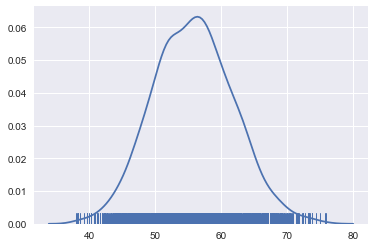

In [78]:
x = [temp for temp in X_train['TS%']]
sns.distplot(x, hist=False, rug=True)

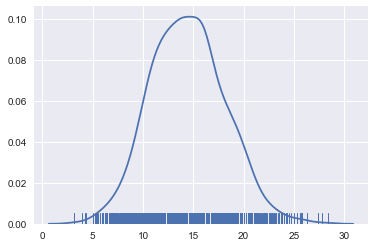

In [79]:
x = [temp for temp in X_train['TOV%']]
sns.distplot(x, hist=False, rug=True)

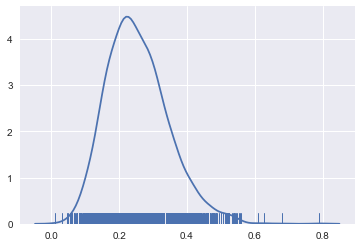

In [80]:
x = [temp for temp in X_train['FTARate']]
sns.distplot(x, hist=False, rug=True)

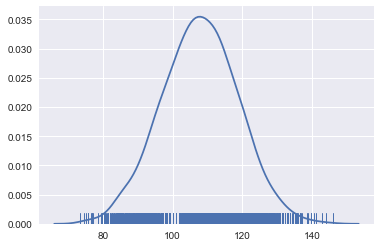

In [81]:
x = [temp for temp in X_train['DefRtg']]
sns.distplot(x, hist=False, rug=True)

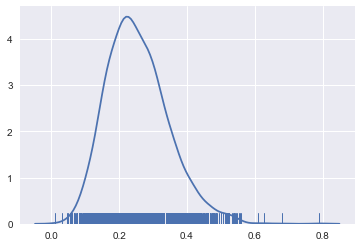

In [82]:
x = [temp for temp in X_train['OppFTARate']]
sns.distplot(x, hist=False, rug=True)

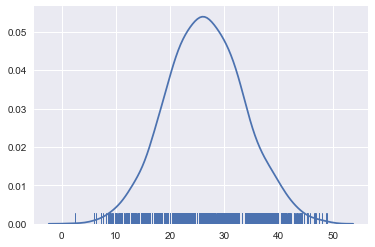

In [83]:
x = [temp for temp in X_train['OppOREB%']]
sns.distplot(x, hist=False, rug=True)

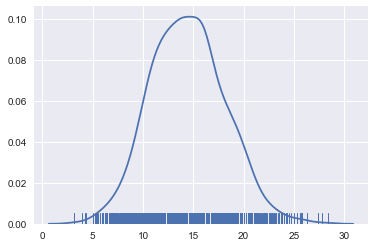

In [84]:
x = [temp for temp in X_train['OppTOV%']]
sns.distplot(x, hist=False, rug=True)

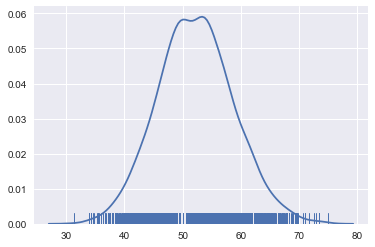

In [85]:
x = [temp for temp in X_train['OppeFG%']]
sns.distplot(x, hist=False, rug=True)